# PHYS-330 - Classical Mechanics - Fall 2017
## Homework 1

1. Prove the vector triple product 
$$
\mathbf{A}\times \left(\mathbf{B}\times\mathbf{C}\right) = \mathbf{B}\left(\mathbf{A}\cdot\mathbf{C}\right) -\mathbf{C}\left(\mathbf{A}\cdot\mathbf{B}\right) 
$$
+ Problem 1.40 from Taylor.
+ Problem 1.32 from Taylor.
+ A sphere of radius $R$ and density $\rho$ falls from an altitude of $H$. The atmospheric density varies with height $x$ (where $x=0$ is sea level) as 
$$ \rho_a = \rho_0 e^{-x/X}.$$
We assume there is quadratic drag of $F_d = 0.2\pi\rho_aR^2v^2$ where $v$ is the velocity of the sphere and $v=0$ at $t=0$. Obtain numerical solutions (i.e. plots) for velocity $v(t)$ and height $x(t)$ for (a) $H=5$ km (b) $H=10$ km (c) $H= 15$ km and (d) $H = 20$ km. You may take $ R = 2.0$ cm, $\rho = 5.00\times 10^{3}$ kg$\cdot$m$^{-3}$, $\rho_0 = 1.29$ kg$\cdot$m$^{-3}$, $X = 7.46\times 10^{3}$ m, Earth's Radius $R_e = 6.37\times 10^{6}$ m and at sea level $g_0 = 9.80$ m$\cdot$s$^{-2}$.
+ Problems 1.50 and 1.51 from Taylor.


### Answer to number 1
![title](images/HW1_Q1.png)


### Answer to number 2

![title](images/HW1_Q2.png)

### answer to number 3

![title](images/HW1_Q3.png)

### Answer to number 4

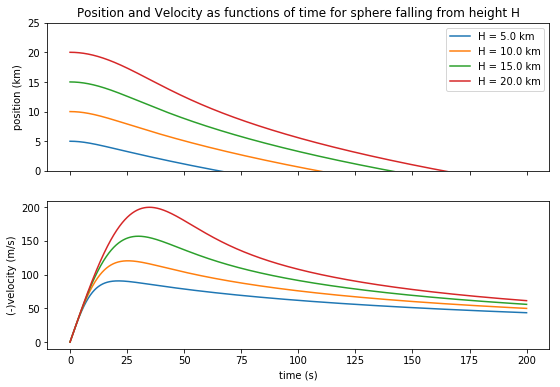

In [5]:

import numpy as np
from matplotlib import pyplot as plt
import scipy
from scipy.integrate import odeint
global g_0,R,rho,rho_0, X,R_e 
fig_size = [9,6]

plt.rcParams["figure.figsize"] = fig_size
g_0 = 9.8
R = 0.02
rho = 5.0e3
rho_0 = 1.29
X = 7.46e3
R_e = 6.37e6

lam_0 = 20.0*rho*R/(3.0*rho_0)
def acc_3_14(x,t):
    return [x[1],-g_0/(1+x[0]/R_e)**2+(x[1]**2)*np.exp(-x[0]/X)/lam_0]

t_out = np.linspace(0,200,10000)
H = np.array([5,10,15,20])*1000

f, axarr = plt.subplots(2, sharex=True)

axarr[0].set_ylim([0,25])
for h in H:
    sol = odeint(acc_3_14,[h,0],t_out)
    axarr[0].plot(t_out,sol[:,0]/1000,label="H = "+str(h/1000) + " km")
    axarr[1].plot(t_out,-sol[:,1],label="H = "+str(h/1000) + " km")
axarr[0].set_ylabel('position (km)')
axarr[1].set_ylabel('(-)velocity (m/s)')
axarr[1].set_xlabel('time (s)')
axarr[0].legend()
axarr[0].set_title('Position and Velocity as functions of time for sphere falling from height H')
plt.show()



### Answers to 1.50 and 1.51

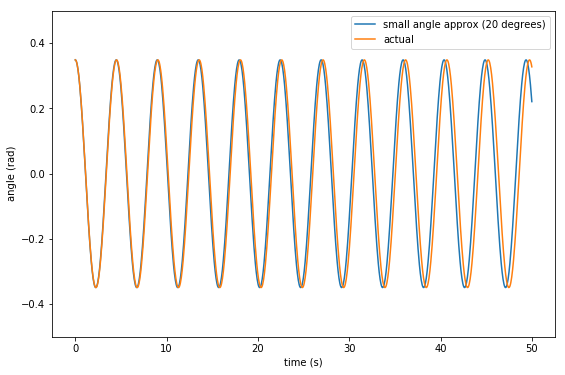

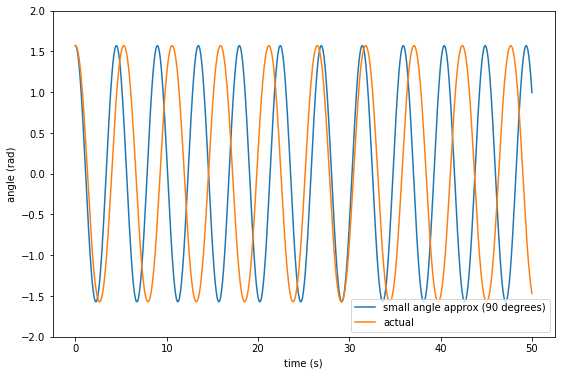

In [6]:
def skateboard(x,t,omega,A):
    return [x[1],-omega**2*np.sin(x[0])]
g = 9.8
R = 5
angle = 20
phi0=angle*np.pi/180.
omega = np.sqrt(g/R)
x0 = [phi0,0]
tout_sk = np.linspace(0,50,1000)
y_harmonic1 = phi0*np.cos(omega*tout_sk)

soln_sk1 = odeint(skateboard, x0,tout_sk,args=(omega,phi0))
plt.ylim([-.5,.5])
plt.plot(tout_sk, phi0*np.cos(omega*tout_sk),label="small angle approx (20 degrees)")
plt.plot(tout_sk,soln_sk1[:,0],label='actual')
plt.xlabel('time (s)')
plt.ylabel('angle (rad)')
plt.legend()
plt.show()

phi0b = np.pi/2.
x0 = [phi0b,0]

y_harmonic = phi0b*np.cos(omega*tout_sk)

soln_sk = odeint(skateboard, x0,tout_sk,args=(omega,phi0b))
plt.ylim([-2.,2.])
plt.plot(tout_sk, y_harmonic,label="small angle approx (90 degrees)")
plt.plot(tout_sk,soln_sk[:,0],label='actual')
plt.xlabel('time (s)')
plt.ylabel('angle (rad)')
plt.legend()
plt.show()



In [8]:
from mpl_toolkits.axes_grid1 import host_subplot
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

fig = plt.figure()
ax = plt.axes()

line, = ax.plot([], [], 'bo',lw=20,markersize=10, label="actual")
line2, = ax.plot([], [], 'ro',lw=20,markersize=10, label = "small angle approx")
ax.legend()
xc=np.linspace(-5,5,100)
yc = -np.sqrt(5**2-xc**2)
ax.plot(xc,yc)
def init():
    line.set_data([], [])
    line2.set_data([],[])
    return line, line2
x =soln_sk[:,0]
y = soln_sk[:,1]


def animate(i):
    plt.title(" Motion for skateboard on halfpipe, acutal solution and one with small angle approximation t = " + str(tout_sk[i])[:4] + " (s)")
    line.set_data(5*np.cos(-np.pi/2+x[i]), 5*np.sin(-np.pi/2+x[i]))
    line2.set_data(5*np.cos(-np.pi/2+y_harmonic[i]), 5*np.sin(-np.pi/2+y_harmonic[i]))
    return line, line2

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(x), interval=40, blit=True)





In [9]:


fig2 = plt.figure()
ax2 = plt.axes()

line3, = ax2.plot([], [], 'bo',lw=20,markersize=10, label="actual")
line4, = ax2.plot([], [], 'ro',lw=20,markersize=10, label = "small angle approx")
def init2():
    line3.set_data([], [])
    line4.set_data([],[])
    return line, line2
ax2.legend()
xc=np.linspace(-5,5,100)
yc = -np.sqrt(5**2-xc**2)
ax2.plot(xc,yc)

x2 =soln_sk1[:,0]
y2 = soln_sk1[:,1]


def animate2(i):
    plt.title(" Motion for skateboard on halfpipe, acutal solution and one with small angle approximation t = " + str(tout_sk[i])[:4] + " (s)")
    line3.set_data(5*np.cos(-np.pi/2+x2[i]), 5*np.sin(-np.pi/2+x2[i]))
    line4.set_data(5*np.cos(-np.pi/2+y_harmonic1[i]), 5*np.sin(-np.pi/2+y_harmonic1[i]))
    return line3, line4

anim2 = animation.FuncAnimation(fig2, animate2, init_func=init2,
                               frames=len(x), interval=20, blit=True)



In [10]:
HTML(anim2.to_html5_video())


In [15]:
HTML(anim.to_html5_video())


In [18]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=25, metadata=dict(artist='Me'), bitrate=1800)


In [14]:
anim.save('im.mp4', writer=writer)

In [19]:
anim2.save('im2.mp4', writer=writer)